In [13]:
import matplotlib.pyplot as plt

In [18]:
files = ["dr_0.0.txt", "dr_0.3.txt", "dr_0.5.txt", "dr_0.7.txt", "dr_0.9.txt"]

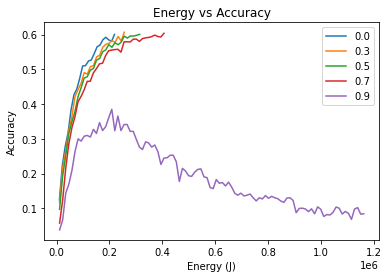

[(219024.37, 1806.52, 'dr_0.0.txt'), (256028.83, 1981.28, 'dr_0.3.txt'), (314112.04, 2432.47, 'dr_0.5.txt'), (405939.52, 3152.21, 'dr_0.7.txt')]


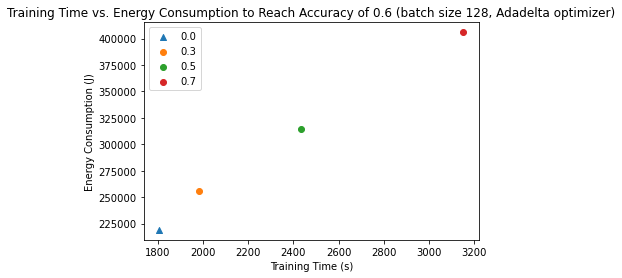

In [29]:
ACC = "Accuracy: "
TIME = ": time="
ENERGY = ", energy="
THRESHOLD = 0.6

energy_time_05 = []
recorded = set()
accuracies_dict = {}
for file in files:
    accuracies = []
    times = []
    energy_consumption = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                accuracies.append(accuracy)
                if accuracy >= THRESHOLD and file not in recorded:
                    energy_time_05.append((energy, time, file))
                    recorded.add(file)
                    break
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    time = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    times.append(time)
                    energy_consumption.append(energy)
#                 if accuracy >= THRESHOLD and file not in recorded:
#                     energy_time_05.append((energy, time, file))
#                     recorded.add(file)
            line = f.readline()

        accuracies_dict[file] = accuracies
    label = file.split('_')[1][:3]
    plt.plot(energy_consumption, accuracies, label=label)

plt.xlabel("Energy (J)")
plt.ylabel("Accuracy")
plt.title("Energy vs Accuracy")
plt.legend()
plt.show()

energies = [elem[0] for elem in energy_time_05]
times = [elem[1] for elem in energy_time_05]
names = [elem[2] for elem in energy_time_05]

print(energy_time_05)
for i in range(len(times)):
    label = names[i].split('_')[1][:3]
    plt.scatter(times[i], energies[i], marker='^' if names[i] == 'dr_0.0.txt' else 'o', label=names[i].split('_')[1][:3])
    if names[i] == 'dr_0.0.txt':
        # Plot line through the origin
#         x = np.linspace(0, max)
    

plt.xlabel("Training Time (s)")
plt.ylabel("Energy Consumption (J)")
plt.title(f"Training Time vs. Energy Consumption to Reach Accuracy of {THRESHOLD} (batch size 128, Adadelta optimizer)")
plt.legend()
plt.show()

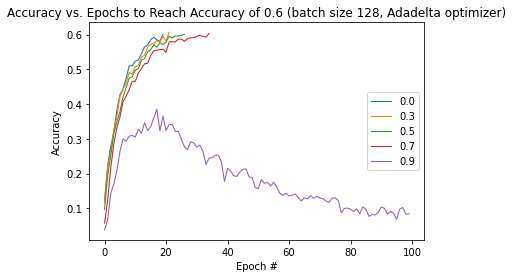

In [25]:
# Accuracy over epochs
for file in files:
    accuracy = accuracies_dict[file]
    epochs = range(len(accuracy))
    label = file.split('_')[1][:3]
    plt.plot(epochs, accuracy, label=label, linewidth=1.1)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs to Reach Accuracy of 0.6 (batch size 128, Adadelta optimizer)')
plt.legend(loc='right')
plt.show()